># <font color = blue> <U>House Price Prediction Assignment - Submission by Satya Prakash</U> </font>

## House Price Prediction using Linear, Ridge and Lasso Regression

### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

### Business Goal 
 
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


### Solution Approach

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation
- Determine the optimal value of lambda for ridge and lasso regression


### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE


import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [1259]:
# reading the dataset
house = pd.read_csv("train.csv")

In [1260]:
# summary of the dataset: 205 rows, 26 columns, no null values
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1261]:
# head
pd.set_option('display.max_columns', None) #display all columns
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

#### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

In [1262]:
# all numeric (float and int) variables in the dataset
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

Here, although the variable ```MSSubClass``` is numeric (int), we'd rather treat it as categorical. Also, we do not want 'Id'.

In [1263]:
# dropping symboling and car_ID 
house_numeric = house_numeric.drop(['MSSubClass','Id'], axis=1)
house_numeric.head()

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5       2003          2003   
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   
3         60.0     9550            7            5       1915          1970   
4         84.0    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0       196.0         706           0        150          856       856   
1         0.0         978           0        284         1262      1262   
2       162.0         486           0        434          920       920   
3         0.0         216           0        540          756       961   
4       350.0         655           0        490         1145      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         1             3             1             8           0   
1         0             3             1             6           1   
2         1             3             1             6           1   
3         0             3             1             7           1   
4         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

This is quite hard to read, and we can rather plot correlations between variables. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [1264]:
# correlation matrix
cor = house_numeric.corr()
cor

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
LotFrontage       1.000000  0.426095     0.251646    -0.059213   0.123349   
LotArea           0.426095  1.000000     0.105806    -0.005636   0.014228   
OverallQual       0.251646  0.105806     1.000000    -0.091932   0.572323   
OverallCond      -0.059213 -0.005636    -0.091932     1.000000  -0.375983   
YearBuilt         0.123349  0.014228     0.572323    -0.375983   1.000000   
YearRemodAdd      0.088866  0.013788     0.550684     0.073741   0.592855   
MasVnrArea        0.193458  0.104160     0.411876    -0.128101   0.315707   
BsmtFinSF1        0.233633  0.214103     0.239666    -0.046231   0.249503   
BsmtFinSF2        0.049900  0.111170    -0.059119     0.040229  -0.049107   
BsmtUnfSF         0.132644 -0.002618     0.308159    -0.136841   0.149040   
TotalBsmtSF       0.392075  0.260833     0.537808    -0.171098   0.391452   
1stFlrSF          0.457181  0.299475     0.476224    -0.144203   0.281986   
2ndFlrSF          0.080177  0.050986     0.295493     0.028942   0.010308   
LowQualFinSF      0.038469  0.004779    -0.030429     0.025494  -0.183784   
GrLivArea         0.402797  0.263116     0.593007    -0.079686   0.199010   
BsmtFullBath      0.100949  0.158155     0.111098    -0.054942   0.187599   
BsmtHalfBath     -0.007234  0.048046    -0.040150     0.117821  -0.038162   
FullBath          0.198769  0.126031     0.550600    -0.194149   0.468271   
HalfBath          0.053532  0.014259     0.273458    -0.060769   0.242656   
BedroomAbvGr      0.263170  0.119690     0.101676     0.012980  -0.070651   
KitchenAbvGr     -0.006069 -0.017784    -0.183882    -0.087001  -0.174800   
TotRmsAbvGrd      0.352096  0.190015     0.427452    -0.057583   0.095589   
Fireplaces        0.266639  0.271364     0.396765    -0.023820   0.147716   
GarageYrBlt       0.070250 -0.024947     0.547766    -0.324297   0.825667   
GarageCars        0.285691  0.154871     0.600671    -0.185758   0.537850   
GarageArea        0.344997  0.180403     0.562022    -0.151521   0.478954   
WoodDeckSF        0.088521  0.171698     0.238923    -0.003334   0.224880   
OpenPorchSF       0.151972  0.084774     0.308819    -0.032589   0.188686   
EnclosedPorch     0.010700 -0.018340    -0.113937     0.070356  -0.387268   
3SsnPorch         0.070029  0.020423     0.030371     0.025504   0.031355   
ScreenPorch       0.041383  0.043160     0.064886     0.054811  -0.050364   
PoolArea          0.206167  0.077672     0.065166    -0.001985   0.004950   
MiscVal           0.003368  0.038068    -0.031406     0.068777  -0.034383   
MoSold            0.011200  0.001205     0.070815    -0.003511   0.012398   
YrSold            0.007450 -0.014261    -0.027347     0.043950  -0.013618   
SalePrice         0.351799  0.263843     0.790982    -0.077856   0.522897   

               YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
LotFrontage        0.088866    0.193458    0.233633    0.049900   0.132644   
LotArea            0.013788    0.104160    0.214103    0.111170  -0.002618   
OverallQual        0.550684    0.411876    0.239666   -0.059119   0.308159   
OverallCond        0.073741   -0.128101   -0.046231    0.040229  -0.136841   
YearBuilt          0.592855    0.315707    0.249503   -0.049107   0.149040   
YearRemodAdd       1.000000    0.179618    0.128451   -0.067759   0.181133   
MasVnrArea         0.179618    1.000000    0.264736   -0.072319   0.114442   
BsmtFinSF1         0.128451    0.264736    1.000000   -0.050117  -0.495251   
BsmtFinSF2        -0.067759   -0.072319   -0.050117    1.000000  -0.209294   
BsmtUnfSF          0.181133    0.114442   -0.495251   -0.209294   1.000000   
TotalBsmtSF        0.291066    0.363936    0.522396    0.104810   0.415360   
1stFlrSF           0.240379    0.344501    0.445863    0.097117   0.317987   
2ndFlrSF           0.140024    0.174561   -0.137079   -0.099260   0.004469   
LowQualFinSF      -0.062419   -0.069071   -0.064503    0.014807   0.02816

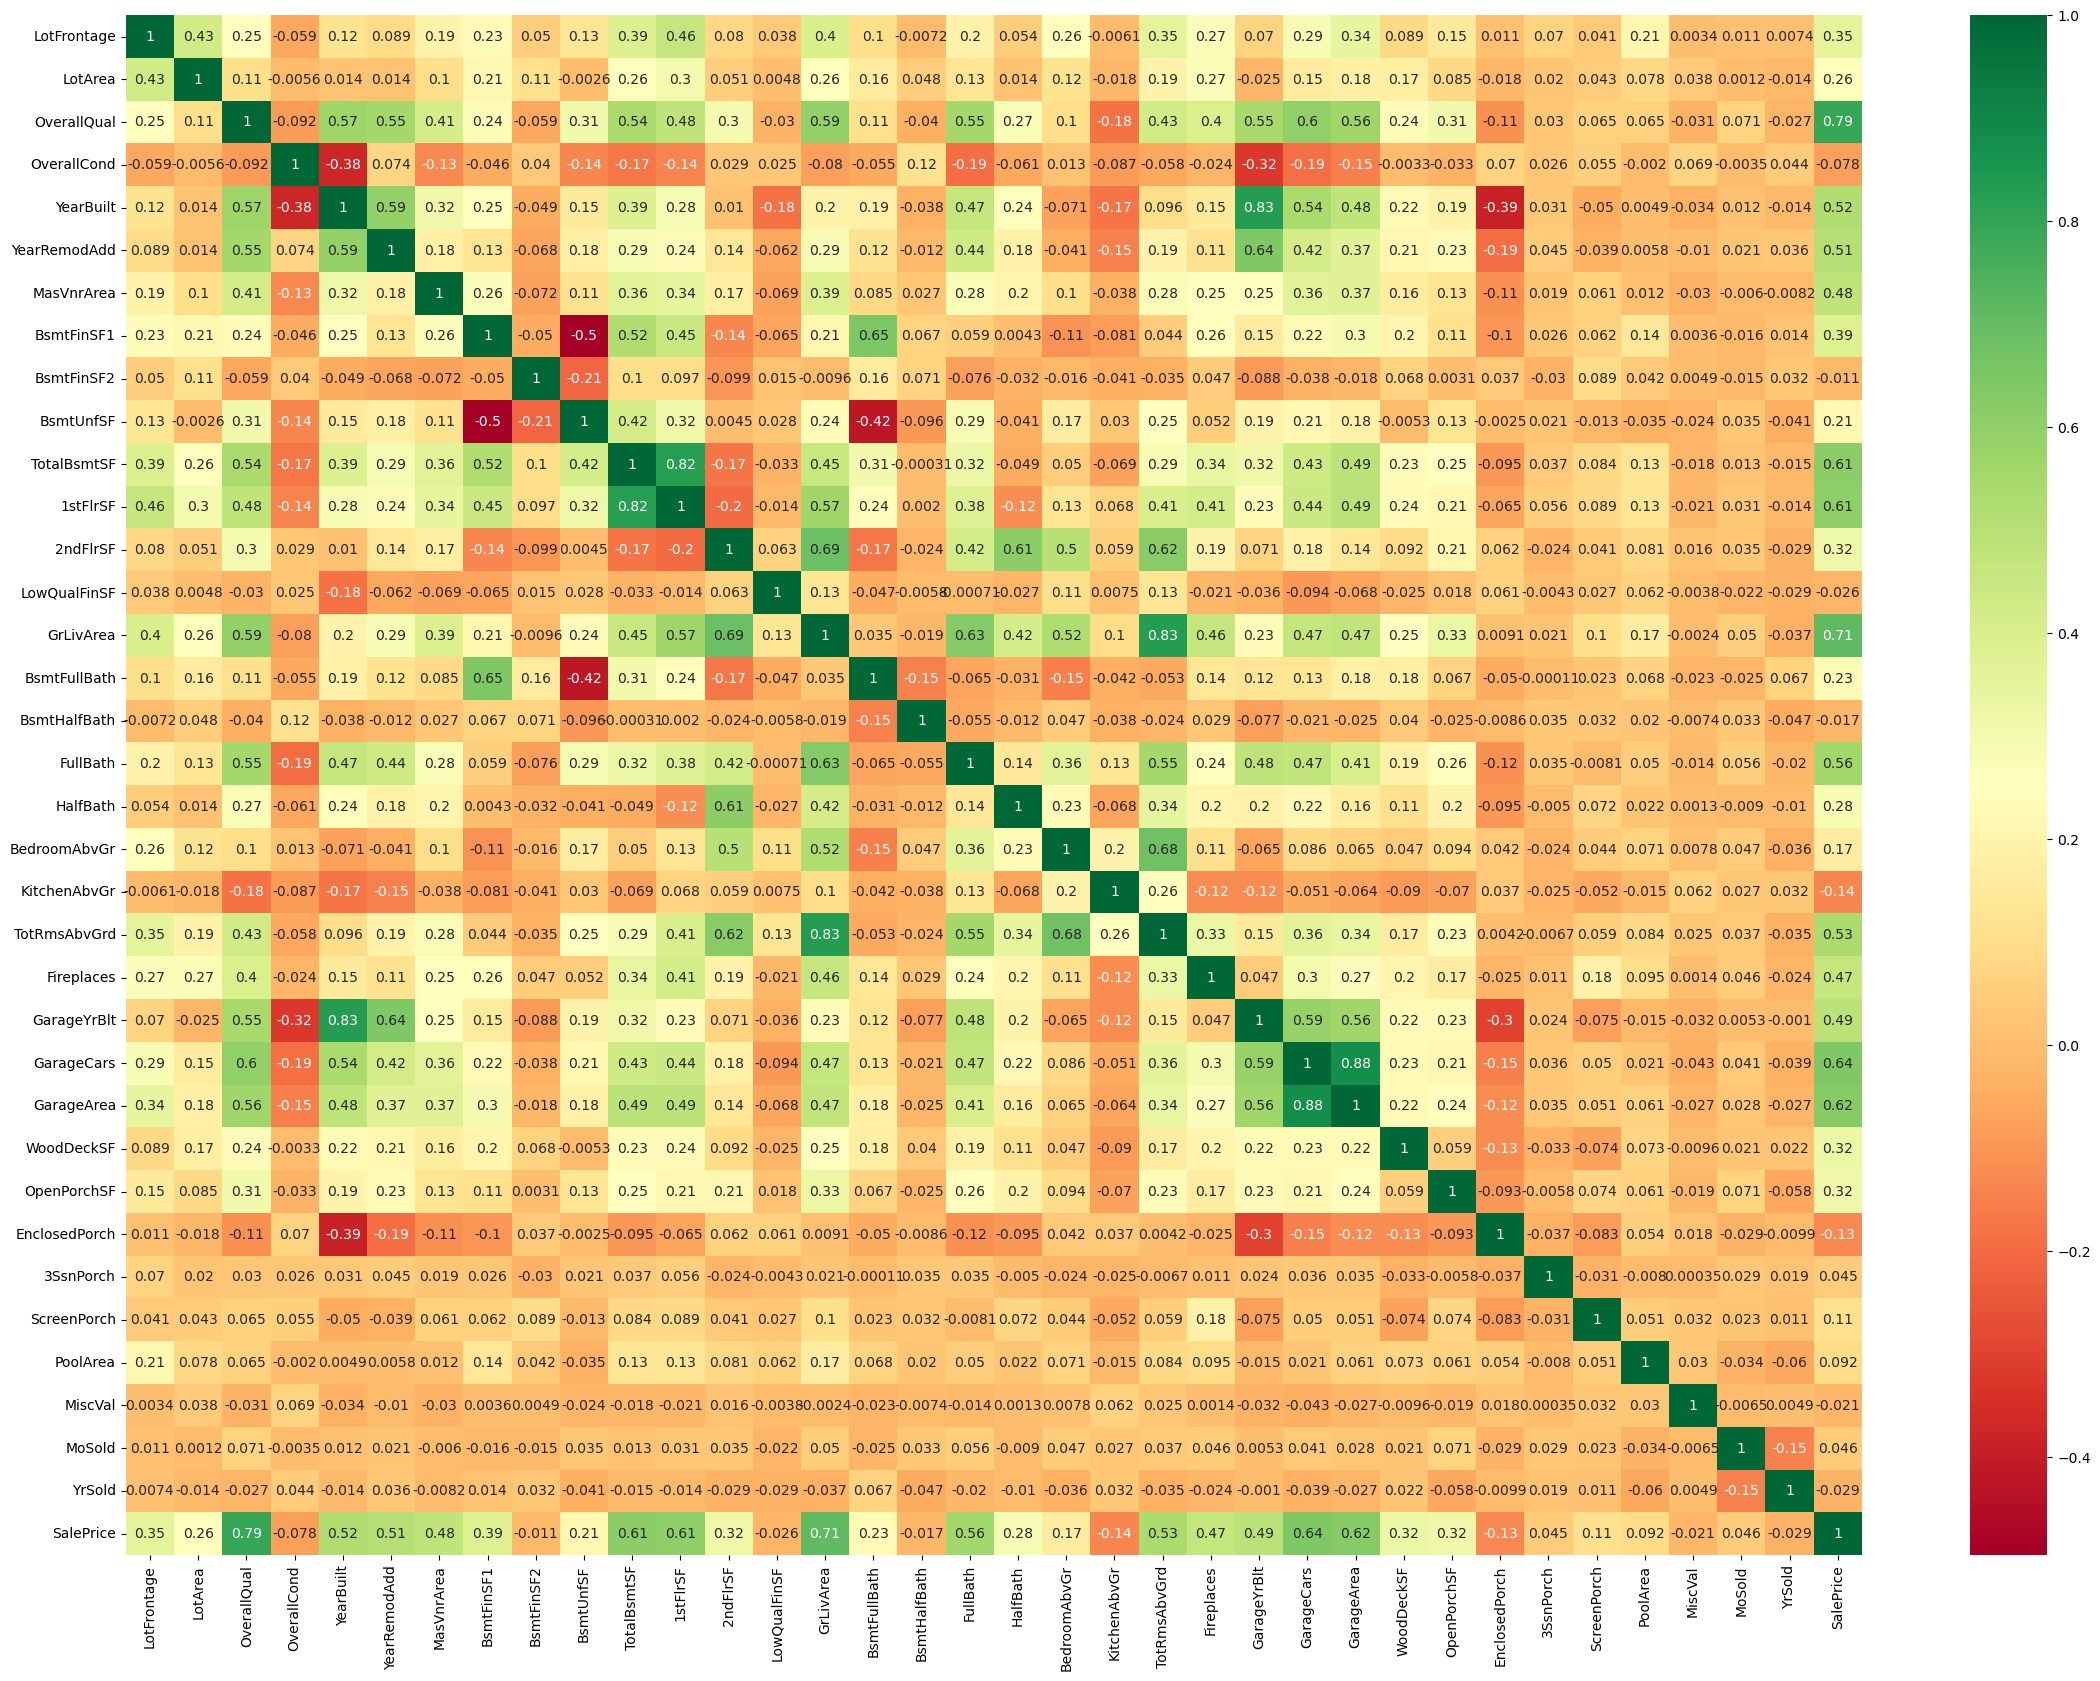

In [1265]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(28,20))

# heatmap
sns.heatmap(cor, cmap="RdYlGn", annot=True)
plt.show()


The heatmap shows some useful insights:

Correlation of SalePrice with independent variables:
- SalePrice is highly (positively) correlated(>0.60) with `OverallQual`, `GrLivArea`, `GarageCars`, `GarageArea`, `TotalBsmtSF`, and `1stFlrSF` in that order.

- SalePrice is negatively correlated to `KitchenAbvGr` and `EnclosedPorch`. This suggest that house having kithing above ground floor is not popular


## 2. Data Cleaning

Let's now conduct some data cleaning steps. 

We've seen that there are no missing values in the dataset. We've also seen that variables are in the correct format, except ```symboling```, which should rather be a categorical variable (so that dummy variable are created for the categories).

Note that it *can* be used in the model as a numeric variable also. 



In [1266]:
# variable formats
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Drop columns that are either not needed or have many missing values

In [1267]:
house.shape

(1460, 81)

In [1268]:
# Dropping ID Columns from dataset since it is not useful in the prediction usecase
house.drop('Id', axis=1, inplace=True)

In [1269]:
# Trying to remove redundant features
def redundant_feature(house):
    redundant = []
    for i in house.columns:
        counts = house[i].value_counts()
        count_max = counts.iloc[0]
        if count_max / len(house) * 100 > 99:
            redundant.append(i)
    redundant = list(redundant)
    return redundant

In [1270]:
redundant_features = redundant_feature(house)
redundant_features

['Street', 'Utilities', 'PoolArea']

In [1271]:
house.drop(redundant_features,axis=1,inplace=True)

house.shape

(1460, 77)

In [1272]:
# Checking the percentage of Null values in all the columns
print('Percentage of Missing Values in each column is as follows:')
print(round(house.isnull().sum()/len(house.index)*100,2).sort_values(ascending=False)[ round(house.isnull().sum()/len(house.index),2) > 0 ] )

Percentage of Missing Values in each column is as follows:
PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
MasVnrType      59.73
FireplaceQu     47.26
LotFrontage     17.74
GarageQual       5.55
GarageCond       5.55
GarageFinish     5.55
GarageYrBlt      5.55
GarageType       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtCond         2.53
BsmtFinType1     2.53
BsmtQual         2.53
MasVnrArea       0.55
dtype: float64


### According to the data dictionary provided, the nulls in these columns indicates the absence of facility which may affect the price
### Hence, we will first impute the categorical variables with 'None'


In [1273]:
null_with_meaning = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in null_with_meaning:
    house[i].fillna("none", inplace=True)

In [1274]:
# Checknull once again
# Checking the count of Null values in all the columns
print('Count of Missing Values in each column is as follows:')
print(house.isnull().sum().sort_values(ascending=False)[ house.isnull().sum() > 0 ] )

Count of Missing Values in each column is as follows:
LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
Electrical       1
dtype: int64


#### Impute missing values for remaining columns

In [1275]:
house.shape

(1460, 77)

In [1276]:
# As per the house dictionary "LotFrontage" is Linear feet of street connected to property.  
# Since it is a numeric with a fair distribution, it can be imputed with similar 'Neighborhood' values

house['LotFrontage'] = house.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
house["GarageYrBlt"].fillna(house["GarageYrBlt"].median(), inplace=True)
house["MasVnrArea"].fillna(house["MasVnrArea"].median(), inplace=True)


In [1277]:
# Checking the count of Null values in all the columns
print('Count of Missing Values in each column is as follows:')
print(house.isnull().sum().sort_values(ascending=False)[ house.isnull().sum() > 0 ] )

Count of Missing Values in each column is as follows:
Electrical    1
dtype: int64


In [1278]:
house = house[house["Electrical"].notna()] #overwrite dataframe with valid rows
house.shape

(1459, 77)

In [1279]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Alley          1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   LotConfig      1459 non-null   object 
 8   LandSlope      1459 non-null   object 
 9   Neighborhood   1459 non-null   object 
 10  Condition1     1459 non-null   object 
 11  Condition2     1459 non-null   object 
 12  BldgType       1459 non-null   object 
 13  HouseStyle     1459 non-null   object 
 14  OverallQual    1459 non-null   int64  
 15  OverallCond    1459 non-null   int64  
 16  YearBuilt      1459 non-null   int64  
 17  YearRemodAdd   1459 non-null   int64  
 18  RoofStyle    

We can now see that all the missing values have been treated and we had to drop just one row

#### Fix data types

In [1280]:
# converting MSSubClass to categorical
house['MSSubClass'] = house['MSSubClass'].astype('object')
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   object 
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Alley          1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   LotConfig      1459 non-null   object 
 8   LandSlope      1459 non-null   object 
 9   Neighborhood   1459 non-null   object 
 10  Condition1     1459 non-null   object 
 11  Condition2     1459 non-null   object 
 12  BldgType       1459 non-null   object 
 13  HouseStyle     1459 non-null   object 
 14  OverallQual    1459 non-null   int64  
 15  OverallCond    1459 non-null   int64  
 16  YearBuilt      1459 non-null   int64  
 17  YearRemodAdd   1459 non-null   int64  
 18  RoofStyle    

#### Create derived columns

In [1281]:
#We can derive a column for 'Age of the property' when it was sold: Name it as 'PropAge'
# PropAge -  Property Age from yearsold - yearbuilt
house['PropAge'] = (house['YrSold'] - house['YearBuilt'])

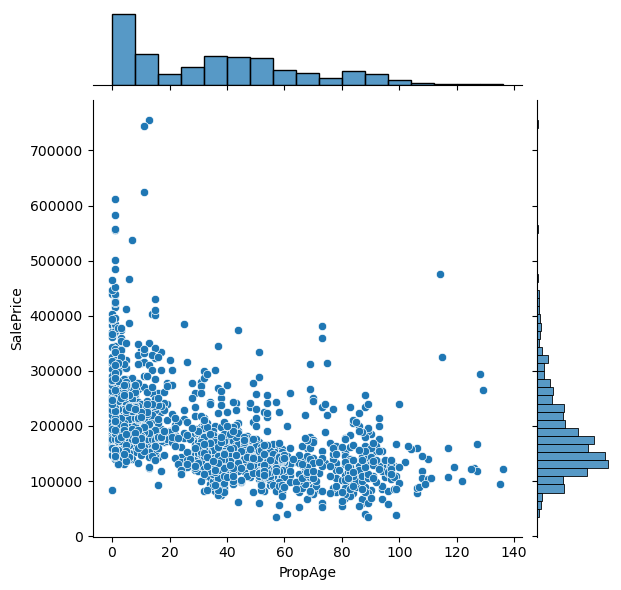

In [1282]:
# PropAge vs SalePrice
sns.jointplot(x = house['PropAge'], y = house['SalePrice'])
plt.show()

Increase in Property Age shows a decreasing saleprice trend i.e newer the property, high is the value

In [1283]:
# Creating some more features based on the existing features

#Vintage house with remodified version of it plays a important role in prediction(i.e. high price )
house['YrBltAndRemod']=house['YearBuilt']+house['YearRemodAdd']
#Overall area for all floors and basement plays an important role, hence creating total area in square foot column
house['Total_sqr_footage'] = (house['BsmtFinSF1'] + house['BsmtFinSF2'] + house['1stFlrSF'] + house['2ndFlrSF'])
# Creating derived column for total number of bathrooms column
house['Total_Bathrooms'] = (house['FullBath'] + (0.5 * house['HalfBath']) + house['BsmtFullBath'] + (0.5 * house['BsmtHalfBath']))
#Creating derived column for total porch area 
house['Total_porch_sf'] = (house['OpenPorchSF'] + house['3SsnPorch'] + house['EnclosedPorch'] + house['ScreenPorch'] + house['WoodDeckSF'])

Now we can drop the column Month sold and Year Sold, Year built and Year remodelled since it will not be required further 

In [1284]:
house = house.drop(['MoSold'], axis = 1)
house = house.drop(['YrSold'], axis = 1)
house = house.drop(['YearBuilt'], axis = 1)
house = house.drop(['YearRemodAdd'], axis = 1)
#house = house.drop(['GarageYrBlt'], axis = 1)
house.head()

MSSubClass MSZoning  LotFrontage  LotArea Alley LotShape LandContour  \
0         60       RL         65.0     8450  none      Reg         Lvl   
1         20       RL         80.0     9600  none      Reg         Lvl   
2         60       RL         68.0    11250  none      IR1         Lvl   
3         70       RL         60.0     9550  none      IR1         Lvl   
4         60       RL         84.0    14260  none      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0            7            5     Gable  CompShg     VinylSd     VinylSd   
1            6            8     Gable  CompShg     MetalSd     MetalSd   
2            7            5     Gable  CompShg     VinylSd     VinylSd   
3            7            5     Gable  CompShg     Wd Sdng     Wd Shng   
4            8            5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       none         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3       none         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ         706          Unf           0        150   
1           Gd          ALQ         978          Unf           0        284   
2           Mn          GLQ         486          Unf           0        434   
3           No          ALQ         216          Unf           0        540   
4           Av          GLQ         655          Unf           0        490   

   TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0          856    GasA        Ex          Y      SBrkr       856       854   
1         1262    GasA        Ex          Y      SBrkr      1262         0   
2          920    GasA        Ex          Y      SBrkr       920       866   
3          756    GasA        Gd          Y      SBrkr       961       756   
4         1145    GasA        Ex          Y      SBrkr      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             3             1          Gd             8        Typ   
1             3             1          TA             6        Typ   
2             3             1          Gd             6        Typ   
3             3             1          Gd             7        Typ   
4             4             1          Gd             9        Typ   

   Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  \
0           0        none     Attchd       2003.0          RFn           2   
1           1          TA     Attchd       1976.0          RFn           2   
2           1          TA     Attchd       2001.0          RFn           2   
3           1         

Lets do some more EDA

#### Numerical Bivariate analysis

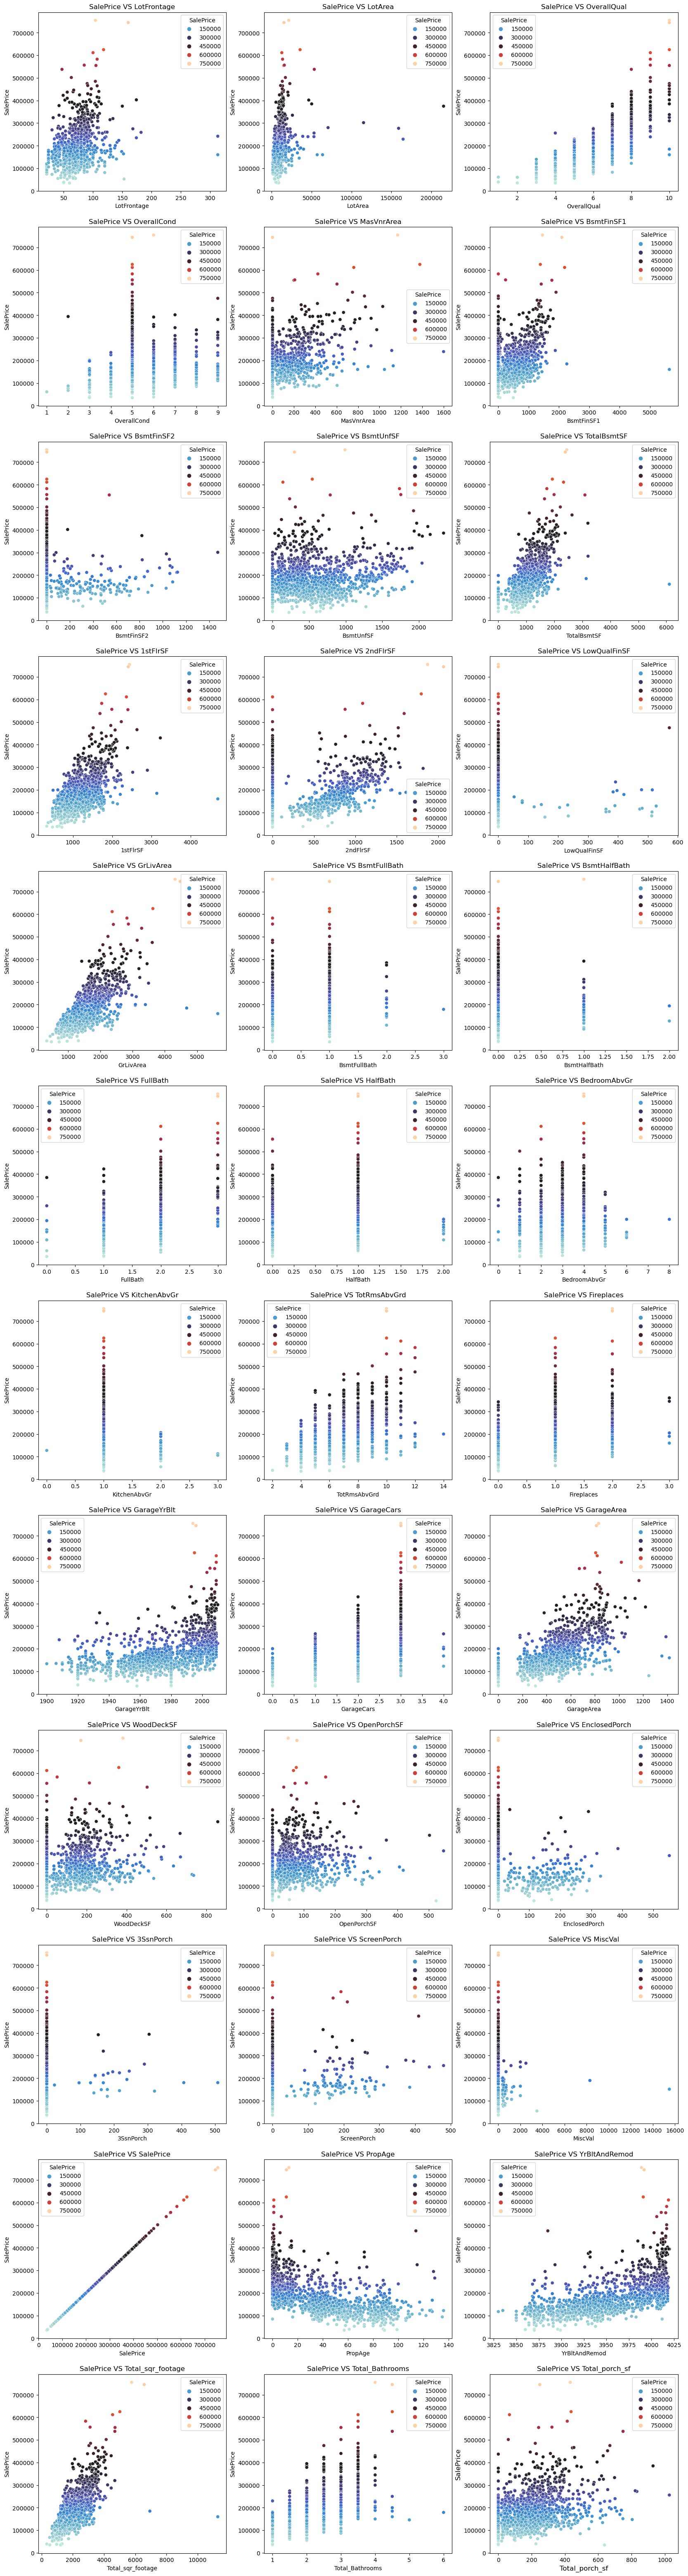

In [1285]:
#Visualising numerical predictor variables with Target Variables
house_num = house.select_dtypes(include=['int64','float64'])
fig,axs= plt.subplots(12,3,figsize=(20,80))
for i,ax in zip(house_num.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=house_num,ax=ax,palette='icefire')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_title('SalePrice'+' VS '+str(i))

Observations:    
- New properties are costlier than older properties.
- MasVnrArea is linearly related to the Price of the property.
- GRLiving Area has a direct corelation with the price of the property.
- Total basement area, which is linearly related with the total living area, size of 1st and 2nd floor also is directly proportional to the price of the property.
- Pool Area and Month sold has no effect on the price.

#### Categorical bivariate analysis

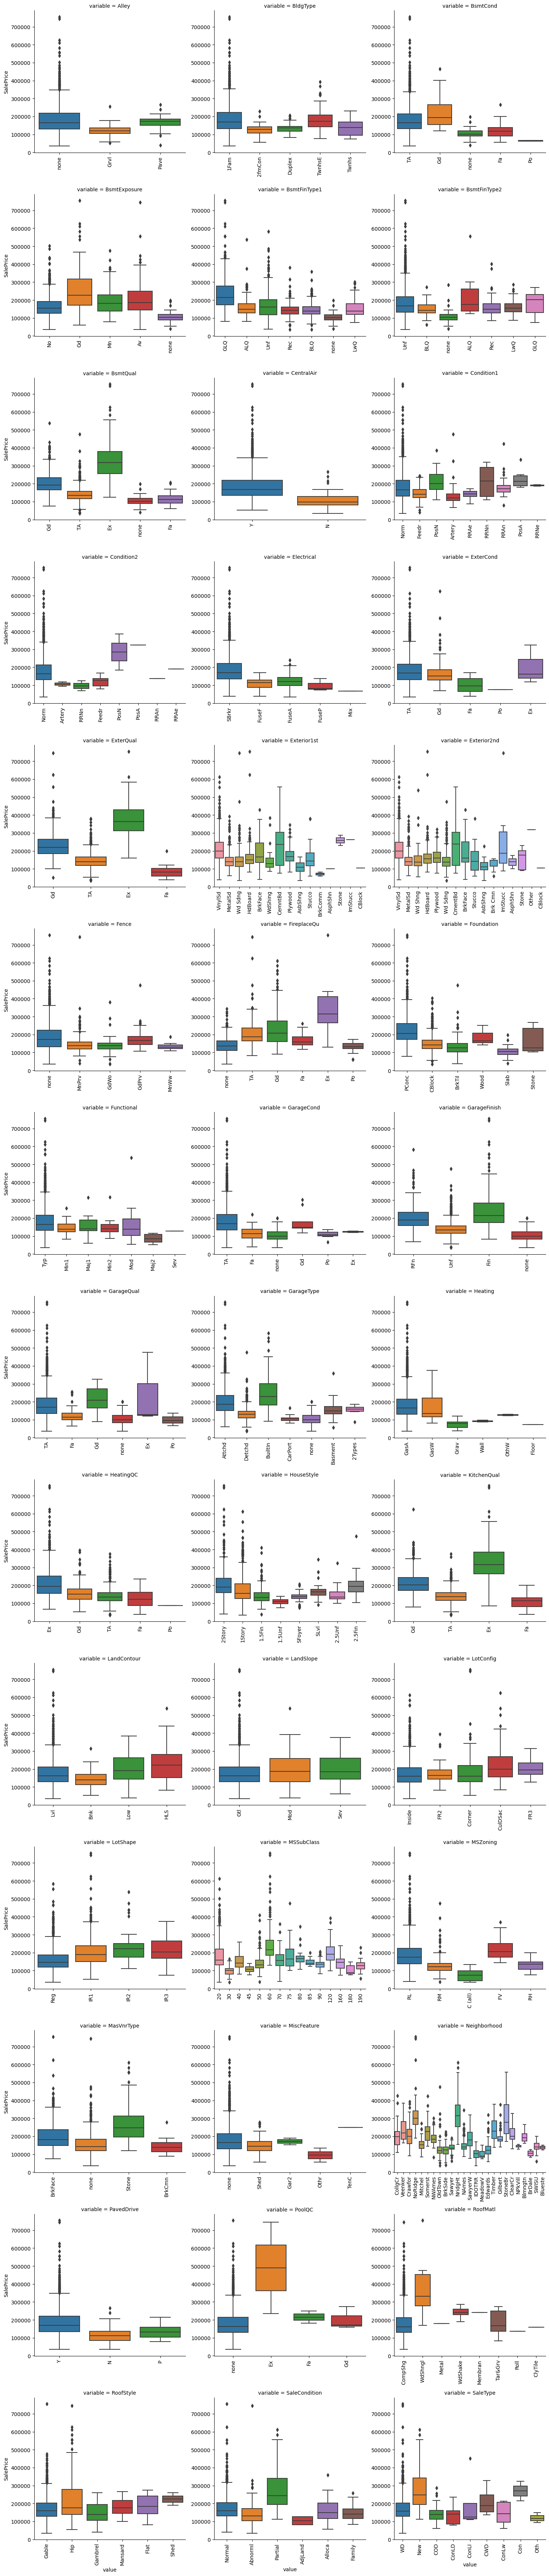

In [1286]:
# Plotting Categorical Features with Sale Price
def facetgrid_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
house_cat = house.select_dtypes(exclude=['int64','float64'])
f = pd.melt(house, id_vars=['SalePrice'], value_vars=sorted(house[house_cat.columns]))
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, height=5)
g = g.map(facetgrid_boxplot, "value", "SalePrice")

Observations:

There are a few outliers which we handle in the feature engineering section by capping them to a lower percentile. From the above box plots we see that:-
 - Paved alleys properties demand a higher price.
 - Houses where the basement quality is good and excellent are sold at higher prices compared to others.
 - Houses with good and excelent garages are sold at higher prices.
 - Houses with good quality kitchens also impact the price in a postive way.
 - Sale Prices does not have impact based on the year of sale.

#### Outlier treatment

In [1287]:
# Removing outliers to make the model more robust
# From EDA we see that Living Area, Garage Area, Basement Area and Lot Area. Removing outliers from these. Other outliers will be handled 
# during power transform
def drop_outliers(x):
    list = []
    outl_col = ['GrLivArea','GarageArea','TotalBsmtSF','LotArea']
    for col in outl_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x  

In [1288]:
house.shape

(1459, 78)

In [1289]:
house = drop_outliers(house)
house.shape

(1454, 78)

#### Create dummy variables for categorical columns

In [1290]:
cat_col=[]
for i in house.columns:
    if house[i].dtypes == 'O':
        cat_col.append(i)

cat_col

['MSSubClass',
 'MSZoning',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [1291]:
house_dummy= pd.get_dummies(house[cat_col], dtype=int)   
house=pd.concat([house,house_dummy],axis=1)

In [1292]:
house= house.drop(cat_col,axis=1)

In [1293]:
house.shape

(1454, 312)

In [1294]:
house.head()

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
0         65.0     8450            7            5       196.0         706   
1         80.0     9600            6            8         0.0         978   
2         68.0    11250            7            5       162.0         486   
3         60.0     9550            7            5         0.0         216   
4         84.0    14260            8            5       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           0        150          856       856       854             0   
1           0        284         1262      1262         0             0   
2           0        434          920       920       866             0   
3           0        540          756       961       756             0   
4           0        490         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0             1             8           0       2003.0           2   
1             1             6           1       1976.0           2   
2             1             6           1       2001.0           2   
3             1             7           1       1998.0           3   
4             1             9           1       2000.0           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   MiscVal  SalePrice  PropAge  YrBltAndRemod  Total_sqr_footage  \
0        0     208500        5           4006               2416   
1        0     181500       31           3952               2240   
2        0     223500        7           4003               2272   
3        0     140000       91           3885               1933   
4        0     250000        8           4000               2853   

   Total_Bathrooms  Total_porch_sf  MSSubClass_20  MSSubClass_30  \
0              3.5              61              0              0   
1              2.5             298              1              0   
2              3.5              42              0              0   
3              2.0             307              0              0   
4              3.5             276              0              0   

   MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  \
0              0              0              0              1              0   
1              0              0              0              0              0   
2              0              0              0              1              0   
3              0              0              0              0              1   
4              0              0              0              1              0   

   MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  \
0              0              0              0              0               0   
1              0              0              0              0               0   
2              0              0              0              0               0   
3              0              0              0              0               0   
4       

Now the data seems ready for model preparation

## 3. Data Preparation 

Let's now prepare the data and build the model.

In [1295]:
# split into X and y

X = house.drop('SalePrice',axis=1) # predictors in variable X
y = house['SalePrice'] # response variable

In [1296]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

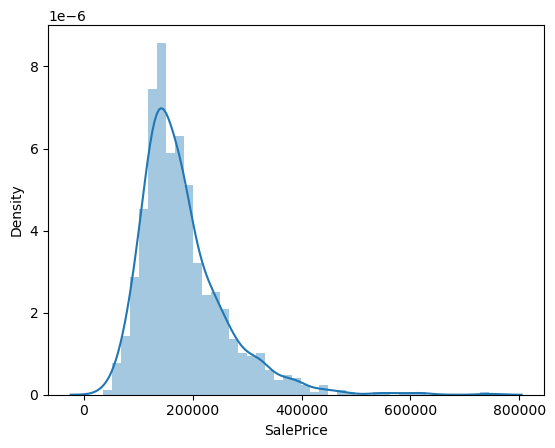

In [1297]:
#Distribution of Target Variable
sns.distplot(y_train)
plt.show()

The Data is right-skewed. Thus we transform it to make it more gaussian.

In [1298]:
#Transforming the Target feature to make the data gaussian
pt = PowerTransformer(method='box-cox', standardize=False)
y_train = pt.fit_transform(y_train.to_frame())
y_test = pt.transform(y_test.to_frame())

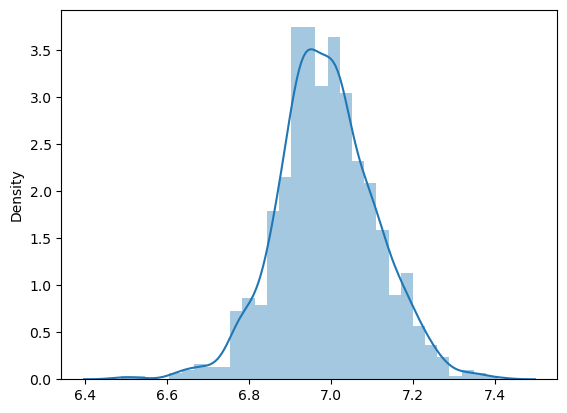

In [1299]:
sns.distplot(y_train)
plt.show()

The target variable is now transformed.

In [1300]:
# Scaling the data using a Minmax Scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = DataFrame(X_train)
X_train.columns = X.columns
X_test = scaler.transform(X_test)
X_test = DataFrame(X_test)
X_test.columns = X.columns

In [1301]:
X_train.head()

LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
0     0.092466  0.081413     0.666667     0.428571     0.05875    0.000000   
1     0.195205  0.093578     0.444444     0.571429     0.12500    0.246801   
2     0.236301  0.159485     0.888889     0.428571     0.00000    0.582267   
3     0.184932  0.124343     0.444444     0.714286     0.00000    0.291133   
4     0.147260  0.086581     0.666667     0.428571     0.05125    0.330896   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0         0.0   0.585616     0.442146  0.403276       0.0           0.0   
1         0.0   0.311644     0.409825  0.364275       0.0           0.0   
2         0.0   0.266267     0.612799  0.627925       0.0           0.0   
3         0.0   0.363442     0.480284  0.449298       0.0           0.0   
4         0.0   0.217466     0.398190  0.350234       0.0           0.0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   0.249638           0.0           0.0  0.666667       0.0      0.333333   
1   0.225495           0.0           0.0  0.333333       0.0      0.333333   
2   0.388701           0.5           0.0  0.666667       0.0      0.500000   
3   0.278127           0.5           0.0  0.333333       0.0      0.500000   
4   0.216803           0.5           0.0  0.666667       0.0      0.333333   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0           0.0           0.4    0.333333     0.954545        0.50   
1           0.0           0.5    0.333333     0.490909        0.25   
2           0.0           0.6    1.000000     0.936364        0.75   
3           0.0           0.5    0.000000     0.618182        0.50   
4           0.0           0.4    0.000000     0.972727        0.50   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0    0.341007    0.154026     0.063985            0.0        0.0          0.0   
1    0.175540    0.000000     0.179159            0.0        0.0          0.0   
2    0.509353    0.242707     0.319927            0.0        0.0          0.0   
3    0.345324    0.000000     0.000000            0.0        0.0          0.0   
4    0.454676    0.154026     0.000000            0.0        0.0          0.0   

   MiscVal   PropAge  YrBltAndRemod  Total_sqr_footage  Total_Bathrooms  \
0      0.0  0.007407       0.952632           0.165758         0.285714   
1      0.0  0.414815       0.410526           0.236294         0.000000   
2      0.0  0.022222       0.931579           0.462328         0.571429   
3      0.0  0.333333       0.700000           0.286791         0.285714   
4      0.0  0.014815       0.968421           0.260019         0.571429   

   Total_porch_sf  MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
0        0.162610            0.0            0.0            0.0            0.0   
1        0.095424            1.0            0.0            0.0            0.0   
2        0.372931            1.0            0.0            0.0            0.0   
3        0.000000            1.0            0.0            0.0            0.0   
4        0.128530            1.0            0.0            0.0            0.0   

   MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  \
0            0.0            0.0             1.0             0.0   
1            0.0            0.0             0.0             0.0   
2            0.0            0.0             0.0             0.0   
3            0.0   

## 3. Model Building and Evaluation

## Lets first check the model using Linear Regression and RFE (OPTIONAL)

In [1302]:
# Importing RFE and LinearRegression
# Since there are more variables to be analysed, we will used the automated feature elimination process (RFE)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [1303]:
# Running RFE 
# Since there are more than 300 variables for analysis, we will run RFE to select some that have high predictive power
lm = LinearRegression()
lm.fit(X_train, y_train)
 # running RFE for top 100 variables
rfe = RFE(lm, n_features_to_select = 100)            
rfe = rfe.fit(X_train, y_train)

In [1304]:
# Check the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 204),
 ('LotArea', False, 198),
 ('OverallQual', False, 197),
 ('OverallCond', False, 200),
 ('MasVnrArea', False, 206),
 ('BsmtFinSF1', False, 186),
 ('BsmtFinSF2', False, 187),
 ('BsmtUnfSF', False, 114),
 ('TotalBsmtSF', False, 113),
 ('1stFlrSF', False, 109),
 ('2ndFlrSF', False, 110),
 ('LowQualFinSF', False, 111),
 ('GrLivArea', False, 108),
 ('BsmtFullBath', False, 104),
 ('BsmtHalfBath', False, 106),
 ('FullBath', False, 105),
 ('HalfBath', False, 107),
 ('BedroomAbvGr', False, 210),
 ('KitchenAbvGr', False, 203),
 ('TotRmsAbvGrd', False, 208),
 ('Fireplaces', False, 207),
 ('GarageYrBlt', False, 209),
 ('GarageCars', False, 201),
 ('GarageArea', False, 205),
 ('WoodDeckSF', False, 97),
 ('OpenPorchSF', False, 94),
 ('EnclosedPorch', False, 96),
 ('3SsnPorch', False, 95),
 ('ScreenPorch', False, 98),
 ('MiscVal', False, 196),
 ('PropAge', False, 199),
 ('YrBltAndRemod', False, 202),
 ('Total_sqr_footage', False, 112),
 ('Total_Bathrooms', False, 103),
 (

In [1305]:
# Select the top 100 variables

col = X_train.columns[rfe.support_]
col

Index(['MSSubClass_90', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Alley_Grvl', 'Alley_Pave', 'Alley_none',
       'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl', 'LotConfig_Corner', 'LotConfig_CulDSac',
       'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside',
       'Condition1_Artery', 'Condition1_Feedr', 'Condition1_Norm',
       'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe',
       'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn',
       'Condition2_Artery', 'Condition2_Feedr', 'Condition2_Norm',
       'Condition2_PosA', 'BldgType_1Fam', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf', 'HouseStyle_1Story',
       'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story',
       'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Flat',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',

In [1306]:
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=211)

In [1307]:
# Creating X_test houseframe with RFE selected variables
X_train_rfe = X_train[col]

In [1308]:
X_train_rfe = pd.DataFrame(X_train[col])

In [1309]:
X_train_rfe.head()

MSSubClass_90  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0            0.0               0.0          0.0          0.0          1.0   
1            0.0               0.0          0.0          0.0          1.0   
2            0.0               0.0          0.0          0.0          1.0   
3            0.0               0.0          0.0          0.0          1.0   
4            0.0               0.0          0.0          0.0          1.0   

   MSZoning_RM  Alley_Grvl  Alley_Pave  Alley_none  LandContour_Bnk  \
0          0.0         0.0         0.0         1.0              0.0   
1          0.0         0.0         0.0         1.0              0.0   
2          0.0         0.0         0.0         1.0              0.0   
3          0.0         0.0         0.0         1.0              0.0   
4          0.0         0.0         0.0         1.0              0.0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_Corner  \
0              0.0              0.0              1.0               0.0   
1              0.0              0.0              1.0               0.0   
2              0.0              0.0              1.0               0.0   
3              0.0              0.0              1.0               1.0   
4              0.0              0.0              1.0               0.0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                0.0            0.0            0.0               1.0   
1                0.0            0.0            0.0               1.0   
2                0.0            0.0            0.0               1.0   
3                0.0            0.0            0.0               0.0   
4                0.0            0.0            0.0               1.0   

   Condition1_Artery  Condition1_Feedr  Condition1_Norm  Condition1_PosA  \
0                0.0               0.0              1.0              0.0   
1                0.0               0.0              1.0              0.0   
2                0.0               0.0              1.0              0.0   
3                0.0               0.0              1.0              0.0   
4                0.0               0.0              1.0              0.0   

   Condition1_PosN  Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  \
0              0.0              0.0              0.0              0.0   
1              0.0              0.0              0.0              0.0   
2              0.0              0.0              0.0              0.0   
3              0.0              0.0              0.0              0.0   
4              0.0              0.0              0.0              0.0   

   Condition1_RRNn  Condition2_Artery  Condition2_Feedr  Condition2_Norm  \
0              0.0                0.0               0.0              1.0   
1              0.0                0.0               0.0              1.0   
2              0.0                0.0               0.0              1.0   
3              0.0                0.0               0.0              1.0   
4              0.0                0.0               0.0              1.0   

   Condition2_PosA  BldgType_1Fam  BldgType_2fmCon  BldgType_Duplex  \
0              0.0            0.0              0.0              0.0   
1              0.0            1.0              0.0              0.0   
2              0.0            1.0              0.0              0.0   
3              0.0            1.0              0.0              0.0   
4              0.0            1.0              0.0              0.0   

   BldgType_Twnhs  BldgType_TwnhsE  HouseStyle_1.5Fin  HouseStyle_1.5Unf  \
0             0.0              1.0                0.0                0.0   
1             0.0              0.0                0.0                0.0   
2             0.0              0.0                0.0                0.0   
3             0.0              0.0                0.0                0.0   
4             0.0              0.0                0.0                0.0   

In [1310]:
X_train_rfe.shape

(1017, 100)

In [1311]:
# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9550442888102861

In [1312]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-2.058127535136949e+19

## Since the Test R2 is too low, we will check for some alternate methods of Regression

In [1313]:
# Check the ranks
list(zip(X_test.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 204),
 ('LotArea', False, 198),
 ('OverallQual', False, 197),
 ('OverallCond', False, 200),
 ('MasVnrArea', False, 206),
 ('BsmtFinSF1', False, 186),
 ('BsmtFinSF2', False, 187),
 ('BsmtUnfSF', False, 114),
 ('TotalBsmtSF', False, 113),
 ('1stFlrSF', False, 109),
 ('2ndFlrSF', False, 110),
 ('LowQualFinSF', False, 111),
 ('GrLivArea', False, 108),
 ('BsmtFullBath', False, 104),
 ('BsmtHalfBath', False, 106),
 ('FullBath', False, 105),
 ('HalfBath', False, 107),
 ('BedroomAbvGr', False, 210),
 ('KitchenAbvGr', False, 203),
 ('TotRmsAbvGrd', False, 208),
 ('Fireplaces', False, 207),
 ('GarageYrBlt', False, 209),
 ('GarageCars', False, 201),
 ('GarageArea', False, 205),
 ('WoodDeckSF', False, 97),
 ('OpenPorchSF', False, 94),
 ('EnclosedPorch', False, 96),
 ('3SsnPorch', False, 95),
 ('ScreenPorch', False, 98),
 ('MiscVal', False, 196),
 ('PropAge', False, 199),
 ('YrBltAndRemod', False, 202),
 ('Total_sqr_footage', False, 112),
 ('Total_Bathrooms', False, 103),
 (

In [1314]:
# Select the top 100 variables

col1 = X_test.columns[rfe.support_]
col1

Index(['MSSubClass_90', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Alley_Grvl', 'Alley_Pave', 'Alley_none',
       'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl', 'LotConfig_Corner', 'LotConfig_CulDSac',
       'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside',
       'Condition1_Artery', 'Condition1_Feedr', 'Condition1_Norm',
       'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe',
       'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn',
       'Condition2_Artery', 'Condition2_Feedr', 'Condition2_Norm',
       'Condition2_PosA', 'BldgType_1Fam', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf', 'HouseStyle_1Story',
       'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story',
       'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Flat',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',

In [1315]:
X_test_rfe = X_test[col1]

In [1316]:
X_test_rfe.head()

MSSubClass_90  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0            0.0               0.0          0.0          0.0          1.0   
1            0.0               0.0          0.0          0.0          0.0   
2            0.0               0.0          0.0          1.0          0.0   
3            0.0               0.0          0.0          0.0          1.0   
4            0.0               0.0          0.0          0.0          1.0   

   MSZoning_RM  Alley_Grvl  Alley_Pave  Alley_none  LandContour_Bnk  \
0          0.0         0.0         0.0         1.0              0.0   
1          1.0         0.0         0.0         1.0              0.0   
2          0.0         0.0         0.0         1.0              0.0   
3          0.0         0.0         0.0         1.0              0.0   
4          0.0         0.0         0.0         1.0              0.0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_Corner  \
0              0.0              0.0              1.0               0.0   
1              0.0              0.0              1.0               0.0   
2              0.0              0.0              1.0               0.0   
3              0.0              0.0              1.0               0.0   
4              0.0              0.0              1.0               0.0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                0.0            0.0            0.0               1.0   
1                0.0            0.0            0.0               1.0   
2                0.0            0.0            0.0               1.0   
3                0.0            0.0            0.0               1.0   
4                0.0            0.0            0.0               1.0   

   Condition1_Artery  Condition1_Feedr  Condition1_Norm  Condition1_PosA  \
0                0.0               0.0              1.0              0.0   
1                0.0               0.0              1.0              0.0   
2                0.0               0.0              1.0              0.0   
3                0.0               0.0              1.0              0.0   
4                0.0               0.0              1.0              0.0   

   Condition1_PosN  Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  \
0              0.0              0.0              0.0              0.0   
1              0.0              0.0              0.0              0.0   
2              0.0              0.0              0.0              0.0   
3              0.0              0.0              0.0              0.0   
4              0.0              0.0              0.0              0.0   

   Condition1_RRNn  Condition2_Artery  Condition2_Feedr  Condition2_Norm  \
0              0.0                0.0               0.0              1.0   
1              0.0                0.0               0.0              1.0   
2              0.0                0.0               0.0              1.0   
3              0.0                0.0               0.0              1.0   
4              0.0                0.0               0.0              1.0   

   Condition2_PosA  BldgType_1Fam  BldgType_2fmCon  BldgType_Duplex  \
0              0.0            1.0              0.0              0.0   
1              0.0            0.0              0.0              0.0   
2              0.0            0.0              1.0              0.0   
3              0.0            1.0              0.0              0.0   
4              0.0            1.0              0.0              0.0   

   BldgType_Twnhs  BldgType_TwnhsE  HouseStyle_1.5Fin  HouseStyle_1.5Unf  \
0             0.0              0.0                0.0                0.0   
1             1.0              0.0                0.0                0.0   
2             0.0              0.0                0.0                0.0   
3             0.0              0.0                0.0                0.0   
4             0.0              0.0                1.0                0.0   

## Ridge and Lasso Regression

Let's now try predicting sale prices by performing ridge and lasso regression.

### Ridge Regression

Fitting 11 folds for each of 28 candidates, totalling 308 fits


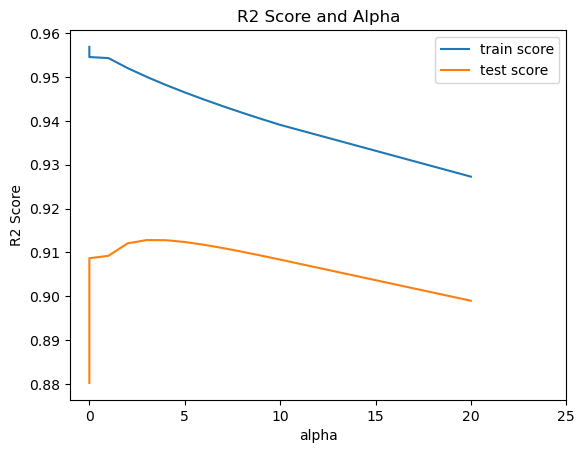

The optimum alpha is 3
The R2 Score of the model on the test dataset for optimum alpha is 0.8682353605684876
The MSE of the model on the test dataset for optimum alpha is 0.0019280926724556356


In [1317]:
# Using RFE to find top 300 variables
rfe = RFE(estimator=Ridge(), n_features_to_select=300)
rfe = rfe.fit(X_train,y_train)
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0,30,5))
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
ridge_final = Ridge(alpha=alpha)
ridge_final.fit(X_train_rfe,y_train)
ridge_coef = ridge_final.coef_
y_test_pred = ridge_final.predict(X_test_rfe)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

In [1318]:
# Checking the VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
high_vif = vif[vif['VIF']>10]
high_vif

Features    VIF
150  Exterior2nd_AsbShng    inf
206     BsmtFinType2_BLQ    inf
204    BsmtFinType1_none    inf
203     BsmtFinType1_Unf    inf
202     BsmtFinType1_Rec    inf
..                   ...    ...
104      Condition1_RRAe    inf
105      Condition1_RRAn    inf
29               MiscVal  65.68
30               PropAge  34.99
31         YrBltAndRemod  19.69

[288 rows x 2 columns]

In [1319]:
# Dropping cols with high VIF
X_train_rfe2 = X_train_rfe.drop(high_vif.Features,axis=1)
X_test_rfe2 = X_test_rfe.drop(high_vif.Features,axis=1)

Now we have all the columns which do not suffer from multicolinearity

Fitting 11 folds for each of 28 candidates, totalling 308 fits


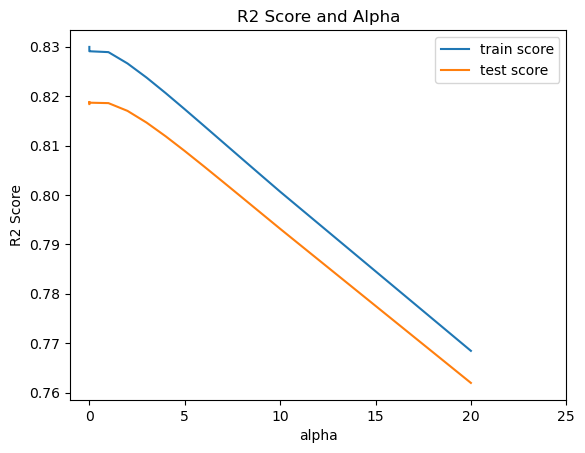

The optimum alpha for ridge is: 0
The R2 Score of the model on the test dataset for optimum alpha is 0.7831986958791176
The MSE of the model on the test dataset for optimum alpha is 0.003172421733613674


In [1320]:
# Building the Ridge Model again
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge(random_state=100)

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe2, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0,30,5))
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha for ridge is:',alpha)
ridge_final2 = Ridge(alpha=alpha,random_state=100)
ridge_final2.fit(X_train_rfe2,y_train)
ridge_coef2 = ridge_final2.coef_
y_train_pred = ridge_final2.predict(X_train_rfe2)
y_test_pred = ridge_final2.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

In [1321]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

metric2 = []
r2_train_lr = r2_score(y_train, y_train_pred)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_train_pred))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8297340958063697
0.7831986958791176
2.4514366284721145
1.3863482975891757
0.002410458828389493
0.003172421733613674


In [1322]:
#Displaying the co-efficients of the model
ridge_coeff2 = pd.DataFrame(np.atleast_2d(ridge_coef2),columns=X_train_rfe2.columns)
ridge_coeff2 = ridge_coeff2.T
ridge_coeff2.rename(columns={0: 'Ridge Co-Efficient'},inplace=True)
ridge_coeff2.sort_values(by=['Ridge Co-Efficient'], ascending=False,inplace=True)
ridge_coeff2.head(20)

Ridge Co-Efficient
OverallQual             0.367308
LotArea                 0.195262
TotRmsAbvGrd            0.115728
LotFrontage             0.091084
GarageYrBlt             0.079909
OverallCond             0.079213
GarageCars              0.075778
Fireplaces              0.067785
GarageArea              0.059203
MasVnrArea              0.047154
BedroomAbvGr           -0.001983
KitchenAbvGr           -0.069855

The Top 12 features impacting the price of the property is stated above.

### Lasso Regression

In [1323]:

# Creating a model with an arbitrary alpha to understand the value ranges
lasso1 = Lasso(alpha=0.0001)        
lasso1.fit(X_train_rfe2, y_train) 

y_test_pred = lasso1.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for 0.0001 alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

The R2 Score of the model on the test dataset for 0.0001 alpha is 0.7846665520368548
The MSE of the model on the test dataset for optimum alpha is 0.0031509428094185143


Fitting 11 folds for each of 11 candidates, totalling 121 fits


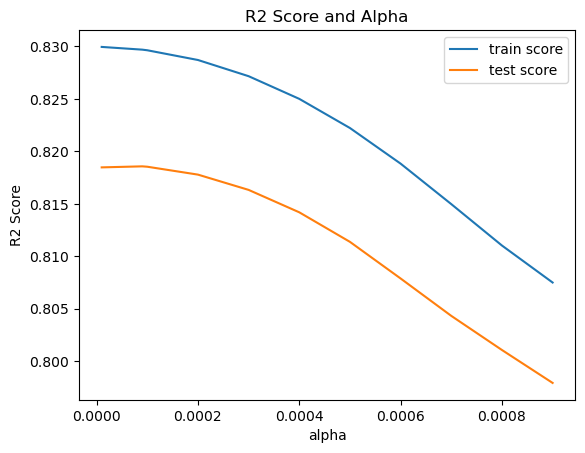

The optimum alpha for lasso is: 9e-05
The R2 Score of the model on the test dataset for optimum alpha is 0.784552366520695
The MSE of the model on the test dataset for optimum alpha is 0.0031526136693545187


In [1324]:
# Building a Lasso Model with GridSearch CV to find the optimum alpha
params = {'alpha': [0.00001, 0.00009, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009 ]}
lasso = Lasso(random_state=100)

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe2, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha for lasso is:',alpha)
lasso_final2 = Lasso(alpha=alpha,random_state=100)
lasso_final2.fit(X_train_rfe2,y_train)
lasso_coef2 = lasso_final2.coef_
y_train_pred = lasso_final2.predict(X_train_rfe2)
y_test_pred = lasso_final2.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

In [1325]:
# Lets calculate some Lasso metrics such as R2 score, RSS and RMSE

metric3 = []
r2_train_lr = r2_score(y_train, y_train_pred)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_train_pred))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8294822835139484
0.784552366520695
26563.26648855656
5058.950675389542
0.0024140237415542186
0.0031526136693545187


In [1326]:
#Displaing the co-efficients of the model
lasso_coeff2 = pd.DataFrame(np.atleast_2d(lasso_coef2),columns=X_train_rfe2.columns)
lasso_coeff2 = lasso_coeff2.T
lasso_coeff2.rename(columns={0: "Lasso Co-Efficient"},inplace=True)
lasso_coeff2.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
lasso_coeff2.head(20)

Lasso Co-Efficient
OverallQual             0.368964
LotArea                 0.185641
TotRmsAbvGrd            0.112195
LotFrontage             0.080451
GarageYrBlt             0.077610
GarageCars              0.077468
OverallCond             0.074541
Fireplaces              0.068814
GarageArea              0.059049
MasVnrArea              0.041505
BedroomAbvGr            0.000000
KitchenAbvGr           -0.061603

The top 12 features of the final Lasso model is stated above.

### The Final Ridge Regression Model is as follows:-

In [1327]:
ridge_final2

Ridge(alpha=0, random_state=100)

### The Final Lasso Regression Model is as follows:-

In [1328]:
lasso_final2

Lasso(alpha=9e-05, random_state=100)

In [1329]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Ridge Regression': metric2,
        'Lasso Regression': metric3   
        }
lr_table

{'Metric': ['R2 Score (Train)',
  'R2 Score (Test)',
  'RSS (Train)',
  'RSS (Test)',
  'MSE (Train)',
  'MSE (Test)'],
 'Ridge Regression': [0.8297340958063697,
  0.7831986958791176,
  2.4514366284721145,
  1.3863482975891757,
  0.049096423784115814,
  0.05632425528680938],
 'Lasso Regression': [0.8294822835139484,
  0.784552366520695,
  26563.26648855656,
  5058.950675389542,
  0.04913271559311798,
  0.056148140390884886]}

In [1330]:
final_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric

Metric  Ridge Regression  Lasso Regression
0  R2 Score (Train)          0.829734          0.829482
1   R2 Score (Test)          0.783199          0.784552
2       RSS (Train)          2.451437      26563.266489
3        RSS (Test)          1.386348       5058.950675
4       MSE (Train)          0.049096          0.049133
5        MSE (Test)          0.056324          0.056148

## Conclusion:

R2 score of approx 0.83 is achieved on both Ridge and Lasso Models. The following factors mostly influence the house price as demonstrated by both the models:-
- OverallQual	
- LotArea	
- TotRmsAbvGrd	
- LotFrontage	
- GarageYrBlt	
- GarageCars	
- OverallCond	
- Fireplaces	
- GarageArea	
- MasVnrArea	
- BedroomAbvGr	
- KitchenAbvGr	

### Subjective questions: Validation

Detailed answers are in pdf

Question 1: What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

If we double, then the alpha for Ridge will be 0.0002 and for Lasso is 0.0018

In [1331]:
# Building Ridge Model by doubling the value of alpha to 2
ridge_dbl = Ridge(alpha=0,random_state=100)
ridge_dbl.fit(X_train_rfe2,y_train)
ridge_dbl_coef = ridge_dbl.coef_
y_test_pred = ridge_dbl.predict(X_test_rfe2)
print('The R2 Score of the Ridge model on the test dataset for doubled alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for doubled alpha is', mean_squared_error(y_test, y_test_pred))
ridge_dbl_coeff = pd.DataFrame(np.atleast_2d(ridge_dbl_coef),columns=X_train_rfe2.columns)
ridge_dbl_coeff = ridge_dbl_coeff.T
ridge_dbl_coeff.rename(columns={0: 'Ridge Doubled Alpha Co-Efficient'},inplace=True)
ridge_dbl_coeff.sort_values(by=['Ridge Doubled Alpha Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
ridge_dbl_coeff.head(20)

The R2 Score of the Ridge model on the test dataset for doubled alpha is 0.7831986958791176
The MSE of the model on the test dataset for doubled alpha is 0.003172421733613674
The most important predictor variables are as follows:


Ridge Doubled Alpha Co-Efficient
OverallQual                           0.367308
LotArea                               0.195262
TotRmsAbvGrd                          0.115728
LotFrontage                           0.091084
GarageYrBlt                           0.079909
OverallCond                           0.079213
GarageCars                            0.075778
Fireplaces                            0.067785
GarageArea                            0.059203
MasVnrArea                            0.047154
BedroomAbvGr                         -0.001983
KitchenAbvGr                         -0.069855

In [1332]:
# Building Lasso Model by doubling the value of alpha to 0.0002
lasso_dbl = Lasso(alpha=0.0018,random_state=100)
lasso_dbl.fit(X_train_rfe2,y_train)
lasso_dbl_coef = lasso_dbl.coef_
y_test_pred = lasso_dbl.predict(X_test_rfe2)
print('The R2 Score of the Lasso model on the test dataset for doubled alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for doubled alpha is', mean_squared_error(y_test, y_test_pred))
lasso_dbl_coeff = pd.DataFrame(np.atleast_2d(lasso_dbl_coef),columns=X_train_rfe2.columns)
lasso_dbl_coeff = lasso_dbl_coeff.T
lasso_dbl_coeff.rename(columns={0: 'Lasso Doubled Alpha Co-Efficient'},inplace=True)
lasso_dbl_coeff.sort_values(by=['Lasso Doubled Alpha Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
lasso_dbl_coeff.head(20)

The R2 Score of the Lasso model on the test dataset for doubled alpha is 0.7487179390513625
The MSE of the model on the test dataset for doubled alpha is 0.003676973598720661
The most important predictor variables are as follows:


Lasso Doubled Alpha Co-Efficient
OverallQual                           0.368065
GarageCars                            0.116199
TotRmsAbvGrd                          0.076931
Fireplaces                            0.072190
GarageYrBlt                           0.036194
GarageArea                            0.024713
LotFrontage                           0.000000
LotArea                               0.000000
OverallCond                           0.000000
MasVnrArea                            0.000000
BedroomAbvGr                          0.000000
KitchenAbvGr                         -0.000000

Question 3: After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [1333]:
#Removing the 5 most important predictor variables from the incoming dataset
X_test_rfe3 = X_test_rfe2.drop(['OverallQual','LotArea','TotRmsAbvGrd','LotFrontage','GarageYrBlt'],axis=1)
X_train_rfe3 = X_train_rfe2.drop(['OverallQual','LotArea','TotRmsAbvGrd','LotFrontage','GarageYrBlt'],axis=1)

# Building Lasso Model with the new dataset
lasso3 = Lasso(alpha=0.0009,random_state=100)
lasso3.fit(X_train_rfe3,y_train)
lasso3_coef = lasso3.coef_
y_test_pred = lasso3.predict(X_test_rfe3)
print('The R2 Score of the model on the test dataset is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset is', mean_squared_error(y_test, y_test_pred))
lasso3_coeff = pd.DataFrame(np.atleast_2d(lasso3_coef),columns=X_train_rfe3.columns)
lasso3_coeff = lasso3_coeff.T
lasso3_coeff.rename(columns={0: 'Lasso Co-Efficient'},inplace=True)
lasso3_coeff.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
lasso3_coeff.head(5)

The R2 Score of the model on the test dataset is 0.5781367941403066
The MSE of the model on the test dataset is 0.006173062511353788
The most important predictor variables are as follows:


Lasso Co-Efficient
GarageCars              0.240194
Fireplaces              0.148310
GarageArea              0.141666
MasVnrArea              0.088077
BedroomAbvGr            0.068846